

# Project: TMDb movie data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be analyzing a  data set (cleaned from original data on Kaggle) associated with information 
about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

> In particular , we'll be interested in finding trends among the popular movies whith high revenues  and ratings, and how they differed from other movies with lower ratings and revenues .  

> Questions to answer during this analyses : 

>Research Question 1 (Which genres are most popular from year to year ?)

>Research Question 2 : What were the most and the least popular movies in this dataset ?

>Research Question 3 : What are the 10 most popular Production companies and the respective success year ?

>Research Question 4 : What kinds of properties are associated with movies that have high revenues ?

>Research Question 5 : Who are the 5 most successful directors ?

>Research Question 6 : How is the evolution of movies' budget through years ?


In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties

In [2]:

# Loading data from "tmdb-movies.csv" file
df=pd.read_csv('tmdb-movies.csv',header=0)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> After executing some primordial observation codes , The first vision of the data gives us some information : 
It is data set with 10866 lines and 21 columns .
These rows are movies and each one of them is associated with two unique identifiers (id and Imdb id) 
In the next columns we have : the popularity score , budget , revenue , original title , cast , home page ,
release date , revenue , etc ..
>
> We probably won't analyze movies Id and imdb_Id (because they are very specific to the movie ) , original title , homepage , tagline and overview won't be really useful for inspecting the trends between movies  .

In [4]:
df.shape

(10866, 21)

>It is data set with 10866 lines and 21 columns .

In [5]:
#convert release_date to timestamp
df['release_date']=pd.to_datetime(df['release_date'])

In [6]:
#cheking the conversion
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [7]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,2066-11-15,15,1.5,1966,127642.279154,0.0


> Clearly we have a problem in the datetime format , python is proceeding with number of the year between 17 and 68 as they are in the next century (example :  year 1966 becomes 2066 after conversion ) . That's why we're going to integrate a function to correct this :  

In [8]:

def fix_date(x):

    if x.year -100 > 1960:
        year = x.year-100 

    else:

        year = x.year

    return datetime.date(year,x.month,x.day)


df['release_date'] = df['release_date'].apply(fix_date)

In [9]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,1966-06-15,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,1966-12-21,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1966-01-01,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,1966-11-02,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,1966-11-15,15,1.5,1966,127642.279154,0.0


In [10]:
#some summary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>--> After executing some summary statistics , observations : 

>--> The least popular movie got  ~0 score and the most popular one got ~33 popularity score 

>--> the minimum budget,revenue and runtime are null which is weird (we should investigate about it ) 

>--> minimum vote count is very far from the max vote count ( 10 and 9767 ) 

>--> the majority of movies runtime was between 90 and 111 minutes / the majority of movies were rated between 5 and 6 

>--> The oldest movie in this data set is released in 1960 and the newest one was released in 2015 .

>--> The majority of movies in this dataset were released between 1995 and 2011 

>--> These movies had a mean adjusted budget of ~150 million $


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning 
> Columns with missing values : imdb_id /cast/homepage/homepage/director/tagline/keywords/overview/overview/genres/production_companies

> We are going to drop the columns we are not going to use  : 

>id , imdb_id , cast , homepage , tagline ,keywords, overview


In [12]:
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline','keywords', 'overview'],axis=1, inplace=True)


In [13]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


> For a better and clearer analyzing we can make the 'original_title' as the first column . 

In [14]:
#change  'original_title' position as the first column
swap=df['original_title']
df.drop(['original_title'],axis=1,inplace=True)
df.insert(0,'original_title',swap)


In [15]:
df.head()

,original_title,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,13.112507,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,11.173104,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,9.335014,190000000,1506249360,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


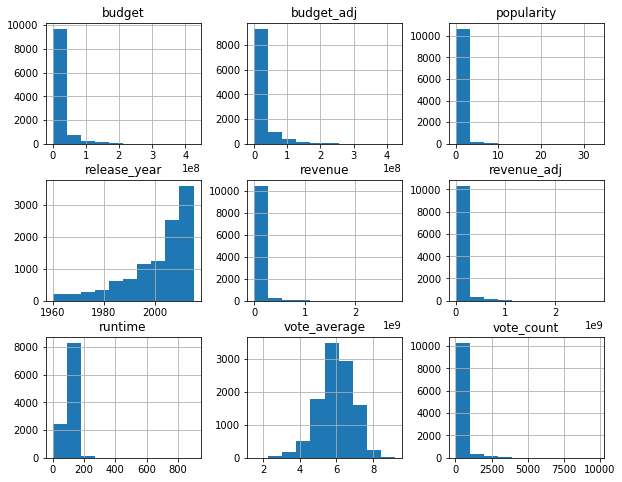

In [16]:
df.hist(figsize=(10,8));


>--> These plots agree with summary statistics we saw before 

> We notice that the plots of revenue , revenue_adj and vote count are skewed to the right

>--> The majority of movies had a budget aound 20 million$  
>-->Vote average was between 5 and 7
>--> The majority had a runtime of ~150minutes

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
original_title          10866 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


>we have  missing data from 3 data columns : director ,genres , production_companies

In [18]:
#checking the null rows of production_companies
df[df.production_companies.isnull()]

,original_title,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,Racing Extinction,0.584363,0,0,Louie Psihoyos,90,Adventure|Documentary,NaN,2015-01-24,36,7.8,2015,0.000000e+00,0.000000e+00
259,Crown for Christmas,0.476341,0,0,Alex Zamm,84,TV Movie,NaN,2015-11-27,10,7.6,2015,0.000000e+00,0.000000e+00
295,12 Gifts of Christmas,0.417191,0,0,Peter Sullivan,84,Family|TV Movie,NaN,2015-11-26,12,6.3,2015,0.000000e+00,0.000000e+00
298,The Girl in the Photographs,0.370258,0,0,Nick Simon,95,Crime|Horror|Thriller,NaN,2015-09-14,10,4.7,2015,0.000000e+00,0.000000e+00
328,Advantageous,0.367617,0,0,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,2015-06-23,29,6.4,2015,0.000000e+00,0.000000e+00
370,Meru,0.314199,0,2334228,Jimmy Chin|Elizabeth Chai Vasarhelyi,89,Adventure|Documentary,NaN,2015-01-25,42,6.9,2015,0.000000e+00,2.147489e+06
374,The Sisterhood of Night,0.302474,0,0,Caryn Waechter,104,Mystery|Drama|Thriller,NaN,2015-04-10,25,6.6,2015,0.000000e+00,0.000000e+00
382,Unexpected,0.295946,0,0,Kris Swanberg,90,Drama|Comedy,NaN,2015-07-24,22,5.7,2015,0.000000e+00,0.000000e+00
388,Walter,0.289526,700000,0,Anna Mastro,87,Drama|Comedy,NaN,2015-03-13,12,5.2,2015,6.439997e+05,0.000000e+00
393,Night Of The Living Deb,0.283194,2000000,0,Kyle Rankin,85,Comedy|Horror,NaN,2015-08-29,13,5.7,2015,1.839999e+06,0.000000e+00


In [19]:
#checking the null rows of production_companies
df[df.director.isnull()]

,original_title,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,Iliza Shlesinger: Freezing Hot,0.126594,0,0,NaN,71,Comedy,New Wave Entertainment,2015-01-23,14,6.6,2015,0.000000e+00,0.000000e+00
548,Sense8: Creating the World,0.108072,0,0,NaN,25,Documentary|Science Fiction,Netflix,2015-08-10,12,7.5,2015,0.000000e+00,0.000000e+00
556,With This Ring,0.100910,0,0,NaN,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,2015-01-24,14,6.5,2015,0.000000e+00,0.000000e+00
1032,Marvel Studios: Assembling a Universe,0.291253,0,0,NaN,43,TV Movie|Documentary,Marvel Studios|ABC Studios,2014-03-18,32,6.3,2014,0.000000e+00,0.000000e+00
1054,Unlocking Sherlock,0.269468,0,0,NaN,60,TV Movie|Documentary,NaN,2014-01-19,11,7.2,2014,0.000000e+00,0.000000e+00
1203,Free to Play,0.119891,150000,0,NaN,75,Documentary,Valve,2014-03-19,40,7.0,2014,1.381637e+05,0.000000e+00
1241,Dance-Off,0.135376,0,0,NaN,0,Romance|Music|Comedy,NaN,2014-01-01,18,5.7,2014,0.000000e+00,0.000000e+00
1288,Top Gear: The Perfect Road Trip 2,0.038364,0,0,NaN,94,Documentary,2 Entertain Video,2014-11-17,12,6.8,2014,0.000000e+00,0.000000e+00
1852,The Diary of Anne Frank,0.256703,0,0,NaN,100,Drama,Darlow Smithson Productions|British Broadcasti...,2009-01-09,19,7.5,2009,0.000000e+00,0.000000e+00
1872,Paa,0.091395,3250000,0,NaN,133,Drama|Family|Foreign,A B Corp,2009-12-04,11,6.1,2009,3.303301e+06,0.000000e+00


In [20]:
#checking the null rows of production_companies
df[df.genres.isnull()]

,original_title,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,Belli di papÃ,0.244648,0,0,Guido Chiesa,100,NaN,NaN,2015-10-29,21,6.1,2015,0.00000,0.0
620,All Hallows' Eve 2,0.129696,0,0,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,2015-10-06,13,5.0,2015,0.00000,0.0
997,Star Wars Rebels: Spark of Rebellion,0.330431,0,0,Steward Lee|Steven G. Lee,44,NaN,NaN,2014-10-03,13,6.8,2014,0.00000,0.0
1712,Prayers for Bobby,0.302095,0,0,Russell Mulcahy,88,NaN,Daniel Sladek Entertainment,2009-02-27,57,7.4,2009,0.00000,0.0
1897,Jonas Brothers: The Concert Experience,0.020701,0,0,Bruce Hendricks,76,NaN,NaN,2009-02-27,11,7.0,2009,0.00000,0.0
2370,Freshman Father,0.081892,0,0,Michael Scott,0,NaN,NaN,2010-06-05,12,5.8,2010,0.00000,0.0
2376,Doctor Who: A Christmas Carol,0.068411,0,0,NaN,62,NaN,NaN,2010-12-25,11,7.7,2010,0.00000,0.0
2853,Vizontele,0.130018,0,0,YÄ±lmaz ErdoÄŸan,110,NaN,NaN,2001-02-02,12,7.2,2001,0.00000,0.0
3279,ì•„ê¸°ì™€ ë‚˜,0.145331,0,0,Kim Jin-Yeong,96,NaN,NaN,2008-08-13,11,6.1,2008,0.00000,0.0
4547,London 2012 Olympic Opening Ceremony: Isles of...,0.520520,0,0,Danny Boyle,220,NaN,BBC,2012-07-27,12,8.3,2012,0.00000,0.0


In [21]:
#we are going to drop these null rows
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 14 columns):
original_title          9807 non-null object
popularity              9807 non-null float64
budget                  9807 non-null int64
revenue                 9807 non-null int64
director                9807 non-null object
runtime                 9807 non-null int64
genres                  9807 non-null object
production_companies    9807 non-null object
release_date            9807 non-null object
vote_count              9807 non-null int64
vote_average            9807 non-null float64
release_year            9807 non-null int64
budget_adj              9807 non-null float64
revenue_adj             9807 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


In [22]:
#cheking duplicates
df.duplicated().sum()

1

In [23]:
df[df.duplicated()]

,original_title,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,TEKKEN,0.59643,30000000,967000,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


> We have one duplicated row (TEKKEN movie) so we have to drop it 

In [24]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 14 columns):
original_title          9806 non-null object
popularity              9806 non-null float64
budget                  9806 non-null int64
revenue                 9806 non-null int64
director                9806 non-null object
runtime                 9806 non-null int64
genres                  9806 non-null object
production_companies    9806 non-null object
release_date            9806 non-null object
vote_count              9806 non-null int64
vote_average            9806 non-null float64
release_year            9806 non-null int64
budget_adj              9806 non-null float64
revenue_adj             9806 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


In [25]:
df.tail()

,original_title,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,The Endless Summer,0.080598,0,0,Bruce Brown,95,Documentary,Bruce Brown Films,1966-06-15,11,7.4,1966,0.000000,0.0
10862,Grand Prix,0.065543,0,0,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,1966-12-21,20,5.7,1966,0.000000,0.0
10863,Beregis Avtomobilya,0.065141,0,0,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1966-01-01,11,6.5,1966,0.000000,0.0
10864,"What's Up, Tiger Lily?",0.064317,0,0,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,1966-11-02,22,5.4,1966,0.000000,0.0
10865,Manos: The Hands of Fate,0.035919,19000,0,Harold P. Warren,74,Horror,Norm-Iris,1966-11-15,15,1.5,1966,127642.279154,0.0


> We see that there are some null values in budget , revenu , budget_adj , revenue_adj : 

>--> we're going to replace these null values with the mean

In [26]:
df.budget_adj.isnull().sum()

0

In [27]:
#Filling null values of budget with the mean
mean=df['budget'].mean()
df['budget'].replace(0,mean,inplace=True)

In [28]:
df.tail()

,original_title,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,The Endless Summer,0.080598,1.612525e+07,0,Bruce Brown,95,Documentary,Bruce Brown Films,1966-06-15,11,7.4,1966,0.000000,0.0
10862,Grand Prix,0.065543,1.612525e+07,0,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,1966-12-21,20,5.7,1966,0.000000,0.0
10863,Beregis Avtomobilya,0.065141,1.612525e+07,0,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1966-01-01,11,6.5,1966,0.000000,0.0
10864,"What's Up, Tiger Lily?",0.064317,1.612525e+07,0,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,1966-11-02,22,5.4,1966,0.000000,0.0
10865,Manos: The Hands of Fate,0.035919,1.900000e+04,0,Harold P. Warren,74,Horror,Norm-Iris,1966-11-15,15,1.5,1966,127642.279154,0.0


In [29]:
#Filling null values of revenue with the mean
mean=df['revenue'].mean()
df['revenue'].replace(0,mean,inplace=True)

In [30]:
#Filling null values of revenue adjusts with the mean
mean=df['revenue_adj'].mean()
df['revenue_adj'].replace(0,mean,inplace=True)

In [31]:
#Filling null values of budget adjusts with the mean
mean=df['budget_adj'].mean()
df['budget_adj'].replace(0,mean,inplace=True)

In [32]:
df.tail()

,original_title,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,The Endless Summer,0.080598,1.612525e+07,4.407785e+07,Bruce Brown,95,Documentary,Bruce Brown Films,1966-06-15,11,7.4,1966,1.935070e+07,5.685528e+07
10862,Grand Prix,0.065543,1.612525e+07,4.407785e+07,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,1966-12-21,20,5.7,1966,1.935070e+07,5.685528e+07
10863,Beregis Avtomobilya,0.065141,1.612525e+07,4.407785e+07,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1966-01-01,11,6.5,1966,1.935070e+07,5.685528e+07
10864,"What's Up, Tiger Lily?",0.064317,1.612525e+07,4.407785e+07,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,1966-11-02,22,5.4,1966,1.935070e+07,5.685528e+07
10865,Manos: The Hands of Fate,0.035919,1.900000e+04,4.407785e+07,Harold P. Warren,74,Horror,Norm-Iris,1966-11-15,15,1.5,1966,1.276423e+05,5.685528e+07


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 14 columns):
original_title          9806 non-null object
popularity              9806 non-null float64
budget                  9806 non-null float64
revenue                 9806 non-null float64
director                9806 non-null object
runtime                 9806 non-null int64
genres                  9806 non-null object
production_companies    9806 non-null object
release_date            9806 non-null object
vote_count              9806 non-null int64
vote_average            9806 non-null float64
release_year            9806 non-null int64
budget_adj              9806 non-null float64
revenue_adj             9806 non-null float64
dtypes: float64(6), int64(3), object(5)
memory usage: 1.1+ MB


>--> After cleaning , now we have 9806 rows instead of 10866

<a id='eda'></a>
## Exploratory Data Analysis

> As a beginning , I've chosen popularity as my dependent variable and release_year , genres , producton_companies and budget as independent ones . 

### Research Question 1 (Which genres are most popular from year to year ?)

> Cleaned dataset : 

In [34]:
df.tail()

,original_title,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,The Endless Summer,0.080598,1.612525e+07,4.407785e+07,Bruce Brown,95,Documentary,Bruce Brown Films,1966-06-15,11,7.4,1966,1.935070e+07,5.685528e+07
10862,Grand Prix,0.065543,1.612525e+07,4.407785e+07,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,1966-12-21,20,5.7,1966,1.935070e+07,5.685528e+07
10863,Beregis Avtomobilya,0.065141,1.612525e+07,4.407785e+07,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1966-01-01,11,6.5,1966,1.935070e+07,5.685528e+07
10864,"What's Up, Tiger Lily?",0.064317,1.612525e+07,4.407785e+07,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,1966-11-02,22,5.4,1966,1.935070e+07,5.685528e+07
10865,Manos: The Hands of Fate,0.035919,1.900000e+04,4.407785e+07,Harold P. Warren,74,Horror,Norm-Iris,1966-11-15,15,1.5,1966,1.276423e+05,5.685528e+07


In [35]:
dfw=df.groupby(['genres','popularity' ])[['release_year']].mean()
dfw.sort_values(by='release_year')

release_year
genres                                             popularity              
Action|Adventure|Western                           1.872132          1960.0
Comedy|Romance                                     0.875173          1960.0
Horror                                             0.065808          1960.0
Comedy|Family                                      0.114188          1960.0
Drama                                              0.138777          1960.0
Crime|Western                                      0.269428          1960.0
Comedy                                             0.136525          1960.0
Horror                                             0.333643          1960.0
                                                   0.110511          1960.0
Comedy|Romance                                     0.055821          1960.0
Comedy|Drama|Romance                               0.390240          1960.0
Action|Drama|Western                               0.421043          1960.0
Horror|Science Fiction                             0.127219          1960.0
Adventure|Family                                   0.465879          1960.0
Action|Drama|History|War                           0.256779          1960.0
Thriller|Music|Comedy|Crime                        0.423531          1960.0
Horror|Thriller                                    0.323180          1960.0
Drama                                              0.271858          1960.0
Thriller|Adventure|Fantasy|Science Fiction|Romance 0.712389          1960.0
Action|Drama|History                               1.136943          1960.0
Comedy|Drama|Romance                               0.947307          1960.0
Action|Adventure|Drama|History|Western             0.310398          1960.0
Action|Drama|Romance|Western                       0.266435          1960.0
Comedy                                             0.225218          1960.0
Adventure|Fantasy|Science Fiction                  0.144106          1960.0
Horror|Thriller                                    0.569424          1960.0
Action|Western                                     0.267118          1960.0
Drama|Family                                       0.254124          1960.0
Action|Drama|Foreign|History|War                   0.194948          1960.0
Drama|History                                      0.162753          1960.0
...                                                                     ...
Thriller                                           0.260045          2015.0
Drama                                              0.224797          2015.0
                                                   0.172245          2015.0
                                                   0.171829          2015.0
                                                   0.412503          2015.0
                                                   0.421790          2015.0
                                                   0.442427          2015.0
                                                   0.462090          2015.0
                                                   0.894477          2015.0
                                                   0.836941          2015.0
                                                   0.781809          2015.0
TV Movie|Action|Science Fiction                    0.369108          2015.0
TV Movie|Adventure|Comedy                          0.370148          2015.0
Drama                                              0.731022          2015.0
                                                   0.729900          2015.0
                                                   0.699570          2015.0
TV Movie|Comedy                                    0.244950          2015.0
Comedy|Horror                                      1.499614          2015.0
Drama                                              0.689571          2015.0
                                                   0.654046          2015.0
                                   

### Research Question 2 : What were the most and the least popular  movies in this dataset ?

In [36]:
#Most popular
df[df['popularity']==df['popularity'].max()]

,original_title,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,32.985763,150000000.0,1.513529e+09,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [37]:
#Least popular
df[df['popularity']==df['popularity'].min()]

,original_title,popularity,budget,revenue,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9977,The Hospital,0.000188,1.612525e+07,4.407785e+07,Arthur Hiller,103,Mystery|Comedy|Drama,Simcha Productions,1971-12-14,10,6.4,1971,1.935070e+07,5.685528e+07


### Research Question 3 : What are the 10 most  popular Production companies and the respective success year   ?

In [38]:
df_00=df.groupby(['production_companies','release_year' ])[['popularity']].max()
df_00.sort_values(by='popularity',ascending=False).head(10)

,,popularity
production_companies,release_year,
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,2015,32.985763
Village Roadshow Pictures|Kennedy Miller Productions,2015,28.419936
Paramount Pictures|Legendary Pictures|Warner Bros.|Syncopy|Lynda Obst Productions,2014,24.949134
Marvel Studios|Moving Picture Company (MPC)|Bulletproof Cupid|Revolution Sun Studios,2014,14.311205
Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,2015,13.112507
Marvel Studios,2014,12.971027
Lucasfilm|Twentieth Century Fox Film Corporation,1977,12.037933
Thunder Road Pictures|Warner Bros.|87Eleven|DefyNite Films|MJW Films,2014,11.422751
Lucasfilm|Truenorth Productions|Bad Robot,2015,11.173104


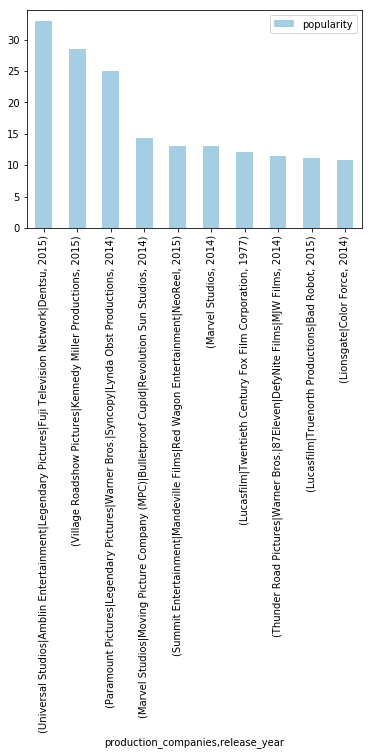

In [39]:
#Plotting

df_00.sort_values(by='popularity',ascending=False).head(10).plot(kind='bar' ,  stacked=True , colormap='Paired')
plt.show()

> --> We see that the most popular properties got their positions with their latest productions (2015/2014 . . )

### Research Question 4 : What kinds of properties are associated with movies that have high revenues ?

In [40]:

df_01=df.groupby(['production_companies','original_title' ])[['revenue']].max()
df_01.sort_values(by='revenue',ascending=False).head()

,,revenue
production_companies,original_title,
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment,Avatar,2.781506e+09
Lucasfilm|Truenorth Productions|Bad Robot,Star Wars: The Force Awakens,2.068178e+09
Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment,Titanic,1.845034e+09
Marvel Studios,The Avengers,1.519558e+09
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,Jurassic World,1.513529e+09


> We'll generate a plot to see how the cinema's "CAKE" of production companies is devided :  

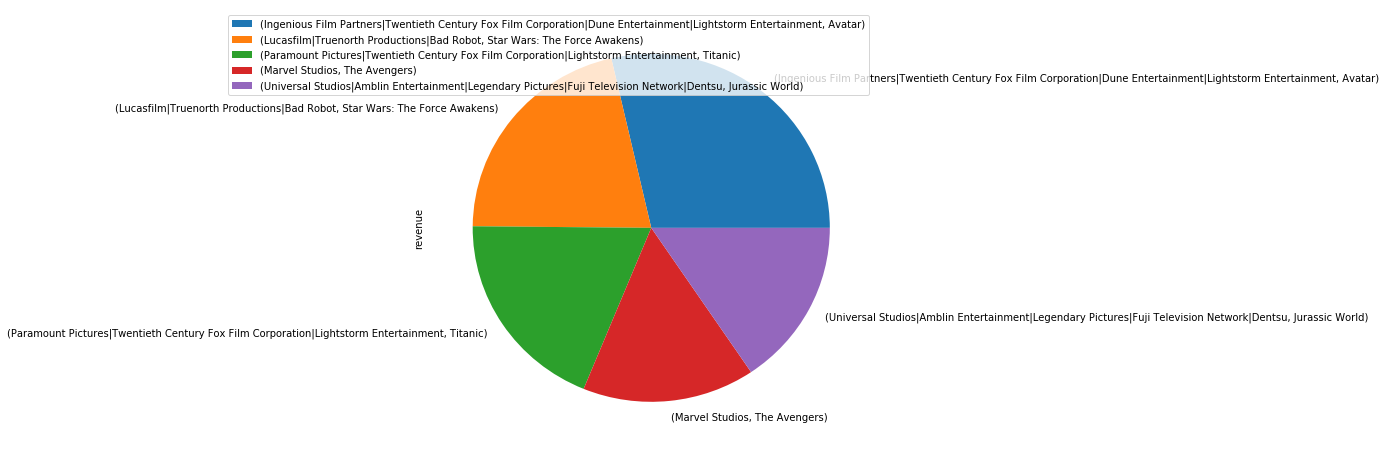

In [41]:
#Plotting
df_01.sort_values(by='revenue',ascending=False).head().plot(kind='pie',figsize=(8,8),subplots=True);
plt.show()

### Research Question 5  : Who are the 5 most successful directors ?

In [42]:
df_02=df.groupby(['director','popularity' ])[['revenue']].max()
df_02.sort_values(by='revenue',ascending=False).head()

,,revenue
director,popularity,
James Cameron,9.432768,2.781506e+09
J.J. Abrams,11.173104,2.068178e+09
James Cameron,4.355219,1.845034e+09
Joss Whedon,7.637767,1.519558e+09
Colin Trevorrow,32.985763,1.513529e+09


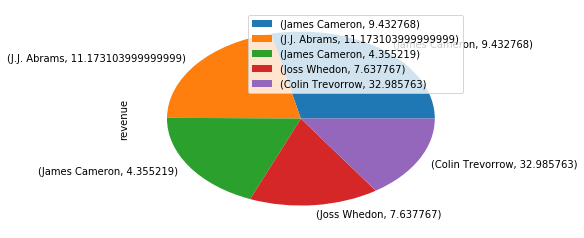

In [43]:
#Plotting
df_02.sort_values(by='revenue',ascending=False).head().plot(kind='pie',subplots=True);
plt.show()

### Research Question 6 : How is the evolution of movies' budget through years ? 

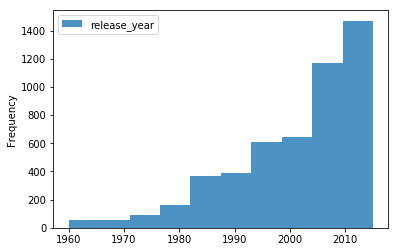

In [44]:
dfr=df.groupby(['budget','revenue' ])[['release_year']].max()
dfr.sort_values(by='release_year');
dfr.plot(kind='hist',alpha=0.8);
plt.show()

> This plot is skewed to the left 

> Movies budget has increased heavily since the 80's

<a id='conclusions'></a>
## Conclusions

> This dataset after analyzing it can give us  information about movie industry .

> We analyzed the distribution  of poplarity between movies , production companies and directors . 

> We observed the evolution of financial amount through the years .





### Resources i refered to : 
>https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors
>https://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/
>https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/
>https://www.pythonprogramming.in/find-minimum-and-maximum-value-of-all-columns-from-pandas-dataframe.html
>https://stackoverflow.com/questions/15741759/find-maximum-value-of-a-column-and-return-the-corresponding-row-values-using-pan
>https://stackoverflow.com/questions/12169170/find-the-max-of-two-or-more-columns-with-pandas
>https://stackoverflow.com/questions/29583312/pandas-sum-of-duplicate-attributes
>https://stackoverflow.com/questions/51914255/pandas-how-to-sum-values-in-a-column-for-duplicate-rows
>https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/
>https://riptutorial.com/python/example/2789/iterate-over-dates
>https://knowledge.udacity.com/questions/116305
>https://knowledge.udacity.com/questions/117107

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0